<a href="https://colab.research.google.com/github/ThomalaSahithi/OIBSIP/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SALES PREDICTION USING PYTHON

In [37]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET

In [38]:
#loading dataset
df = pd.read_csv('Advertising.csv')
#printing first 6 rows
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [39]:
#printing column names
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

INFORMATION AND THE STATISTICS OF THE DATASET

In [40]:
#basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [41]:
#summary statistics
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


CLEANING THE DATASET

In [42]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Fill missing values
df.fillna(df.mean(), inplace=True)  # For numerical columns
df.dropna(inplace=True)

#removing duplicates
df.drop_duplicates(inplace=True)

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [43]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Define the numerical features you want to scale
numerical_features = ['TV', 'Radio', 'Newspaper']

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the scaled values
print(df[numerical_features].head())

         TV     Radio  Newspaper
0  0.969852  0.981522   1.778945
1 -1.197376  1.082808   0.669579
2 -1.516155  1.528463   1.783549
3  0.052050  1.217855   1.286405
4  0.394182 -0.841614   1.281802


VISUALIZATIONS

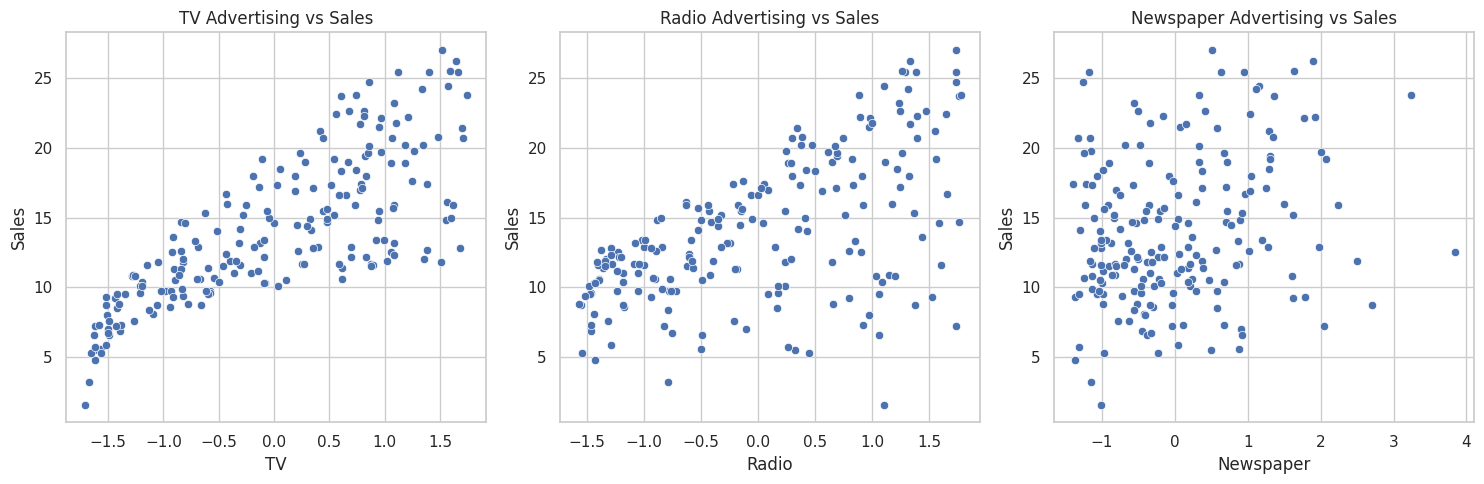

In [44]:
# Set the style for the plots
sns.set(style="whitegrid")

# Scatter plots for each advertising platform
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV Advertising vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Radio Advertising vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper Advertising vs Sales')

plt.tight_layout()
plt.show()

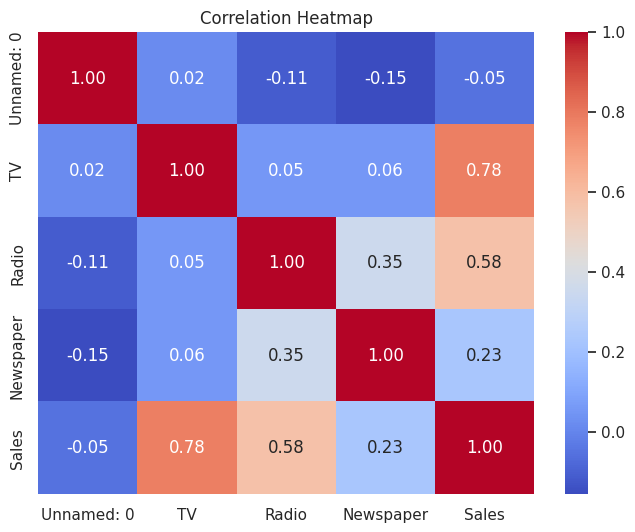

In [45]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

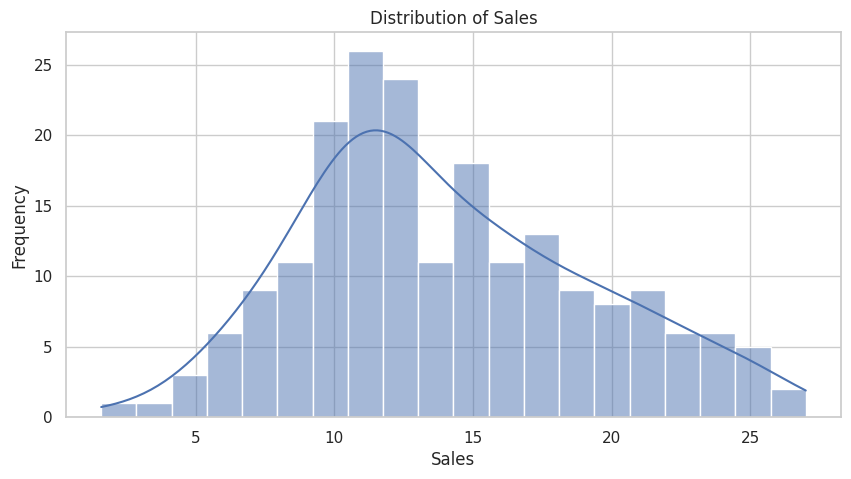

In [46]:
# Distribution of Sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

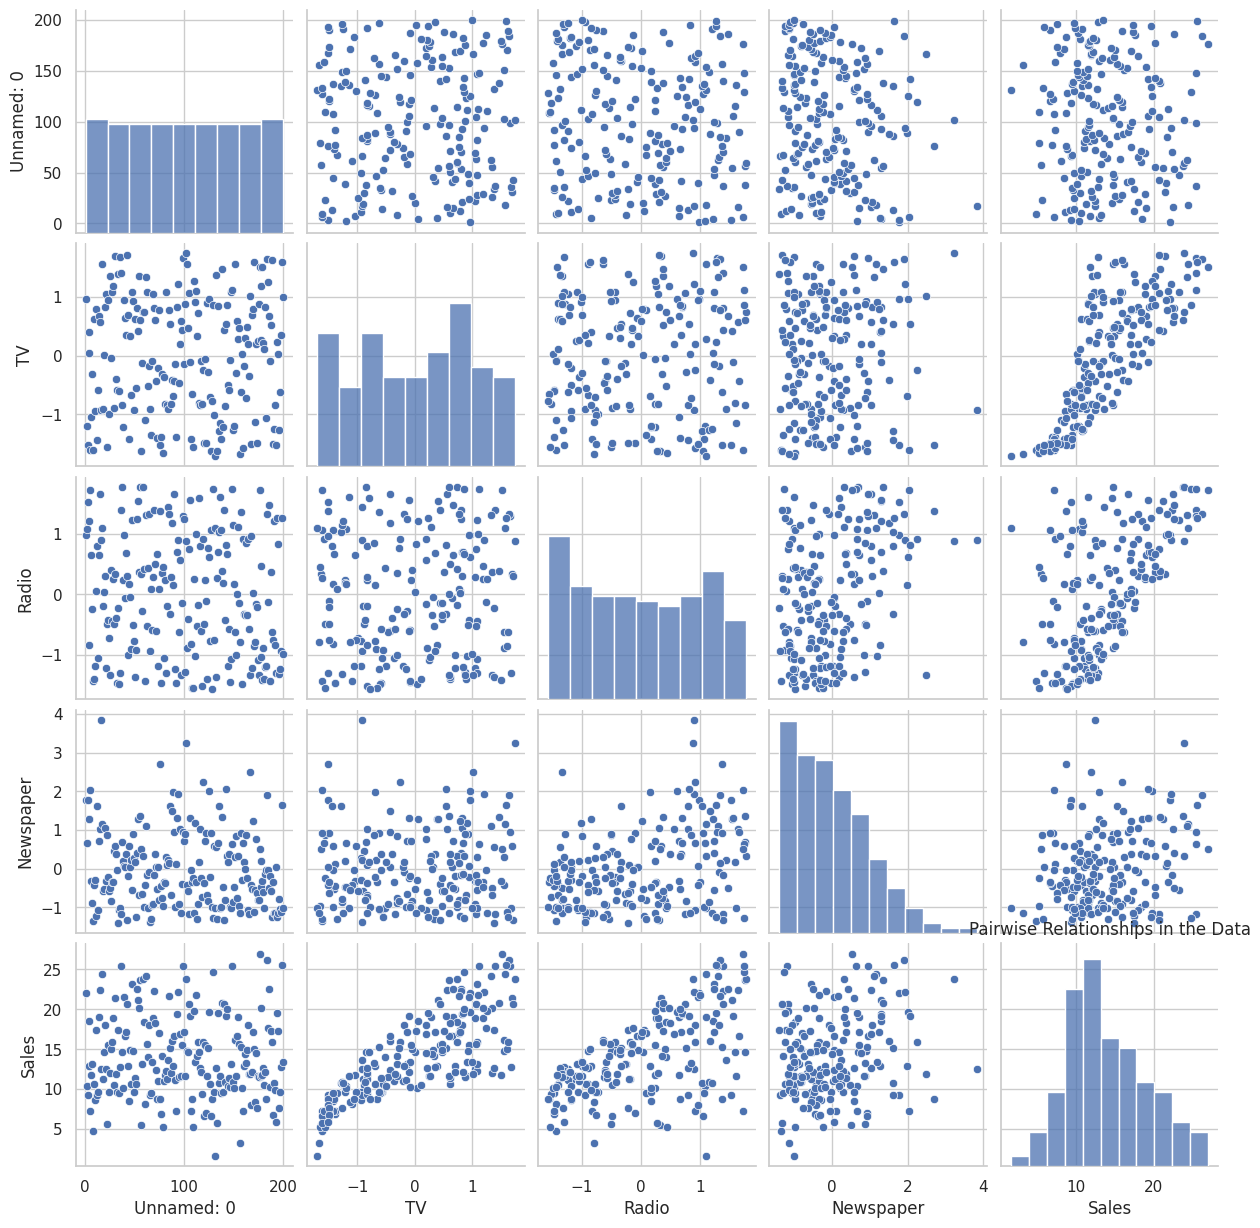

In [47]:
# Pair Plot
sns.pairplot(df)
plt.title('Pairwise Relationships in the Data')
plt.show()

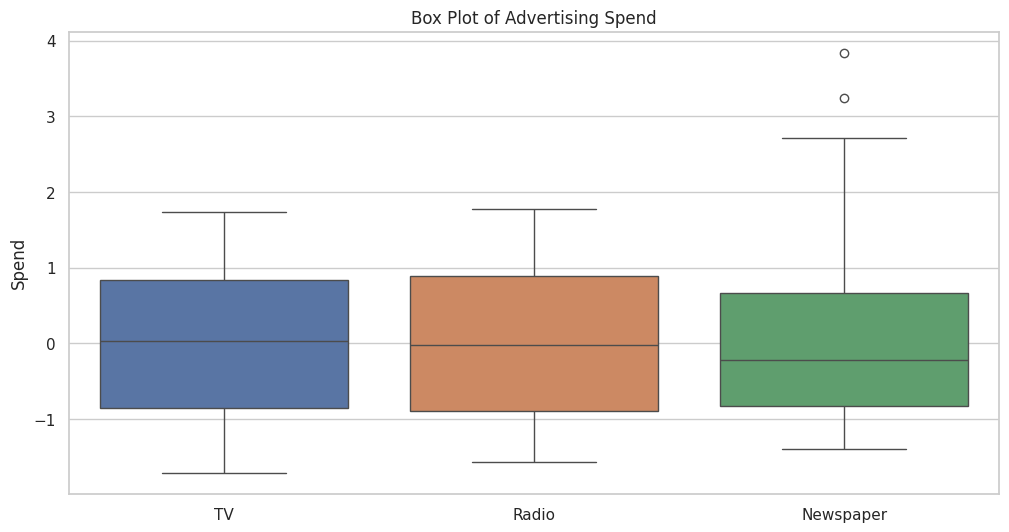

In [48]:
# Box Plot for Advertising Spend
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title('Box Plot of Advertising Spend')
plt.ylabel('Spend')
plt.show()

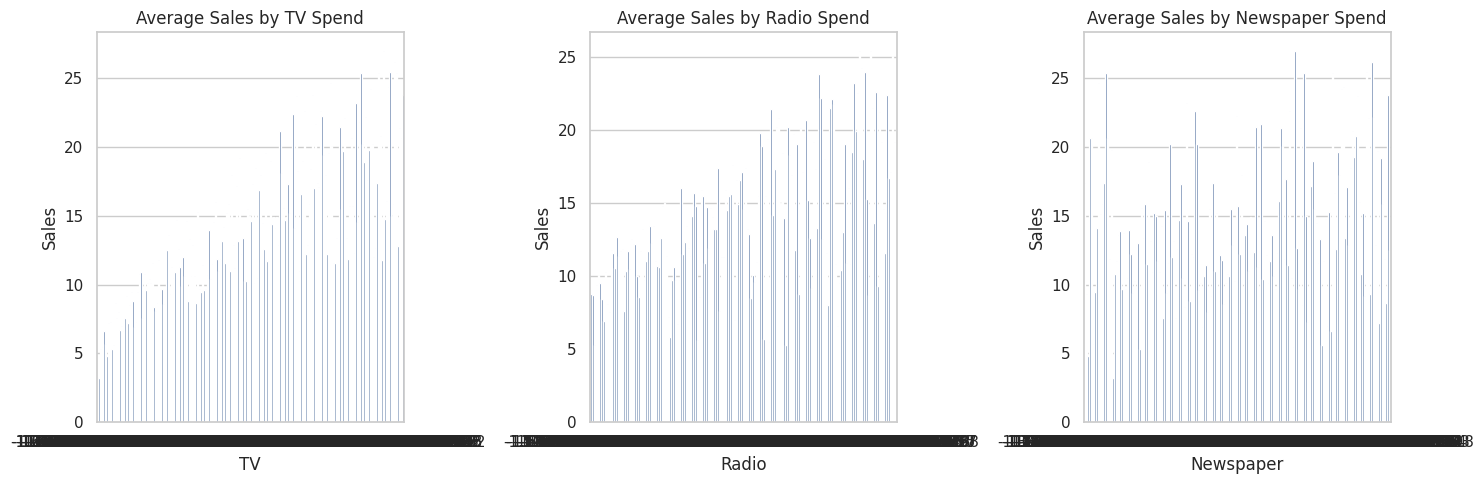

In [49]:
# Average Sales vs Advertising Spend
avg_sales_tv = df.groupby('TV')['Sales'].mean().reset_index()
avg_sales_radio = df.groupby('Radio')['Sales'].mean().reset_index()
avg_sales_newspaper = df.groupby('Newspaper')['Sales'].mean().reset_index()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='TV', y='Sales', data=avg_sales_tv)
plt.title('Average Sales by TV Spend')

plt.subplot(1, 3, 2)
sns.barplot(x='Radio', y='Sales', data=avg_sales_radio)
plt.title('Average Sales by Radio Spend')

plt.subplot(1, 3, 3)
sns.barplot(x='Newspaper', y='Sales', data=avg_sales_newspaper)
plt.title('Average Sales by Newspaper Spend')

plt.tight_layout()
plt.show()

PREPARING THE DATASET

In [50]:
# Features and target
from sklearn.model_selection import train_test_split
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL 1 : LINEAR REGRESSION

In [51]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import xgboost as xgb
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred_reg = lin_reg.predict(X_test)

# Calculate regression metrics
mse_lin = mean_squared_error(y_test, y_pred_reg)
rmse_lin = np.sqrt(mse_lin)  # Root Mean Squared Error
mae_lin = mean_absolute_error(y_test, y_pred_reg)
r2_lin = r2_score(y_test, y_pred_reg)

print(f"Linear Regression MSE: {mse_lin:.2f}")
print(f"Linear Regression RMSE: {rmse_lin:.2f}")
print(f"Linear Regression MAE: {mae_lin:.2f}")
print(f"Linear Regression R²: {r2_lin:.2f}")

Linear Regression MSE: 3.17
Linear Regression RMSE: 1.78
Linear Regression MAE: 1.46
Linear Regression R²: 0.90


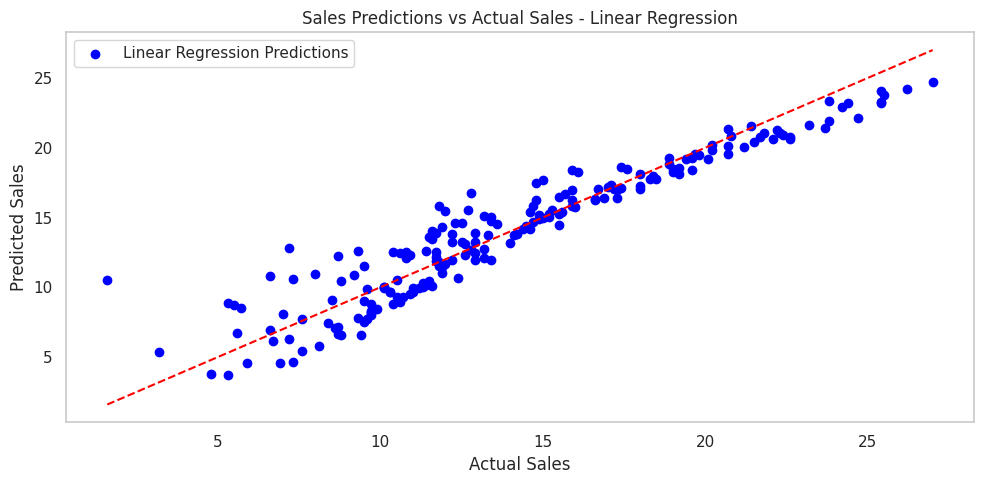

In [52]:
# Forecasting with Linear Regression
full_predictions_lin = lin_reg.predict(X)

# Plotting for Linear Regression
plt.figure(figsize=(10, 5))
plt.scatter(y, full_predictions_lin, label='Linear Regression Predictions', color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red')  # Identity line
plt.title('Sales Predictions vs Actual Sales - Linear Regression')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

MODEL 2: DECISION TREE

In [53]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model
dt_reg.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_reg.predict(X_test)

# Calculate regression metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt:.2f}")
print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Decision Tree MAE: {mae_dt:.2f}")
print(f"Decision Tree R²: {r2_dt:.2f}")

Decision Tree MSE: 2.17
Decision Tree RMSE: 1.47
Decision Tree MAE: 0.99
Decision Tree R²: 0.93


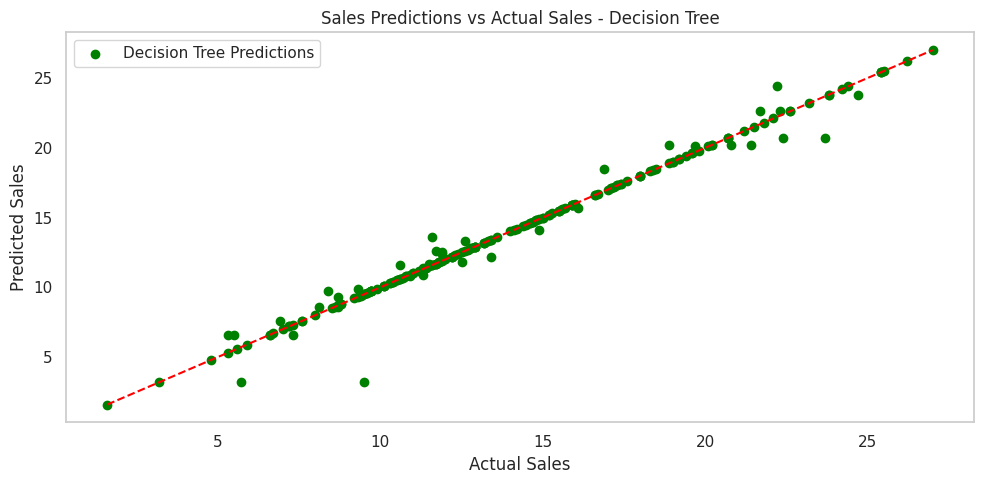

In [54]:
# Forecasting with Decision Tree
full_predictions_dt = dt_reg.predict(X)

# Plotting for Decision Tree
plt.figure(figsize=(10, 5))
plt.scatter(y, full_predictions_dt, label='Decision Tree Predictions', color='green')
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red')  # Identity line
plt.title('Sales Predictions vs Actual Sales - Decision Tree')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

MODEL 3 : RANDOM FOREST

In [55]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_reg.predict(X_test)

# Calculate regression metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

Random Forest MSE: 0.59
Random Forest RMSE: 0.77
Random Forest MAE: 0.62
Random Forest R²: 0.98


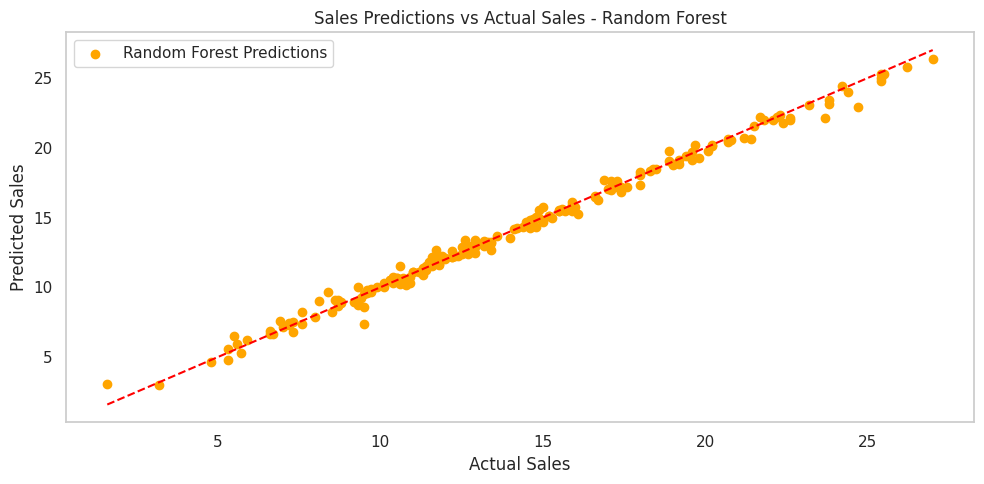

In [56]:
# Forecasting with Random Forest
full_predictions_rf = rf_reg.predict(X)

# Plotting for Random Forest
plt.figure(figsize=(10, 5))
plt.scatter(y, full_predictions_rf, label='Random Forest Predictions', color='orange')
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red')  # Identity line
plt.title('Sales Predictions vs Actual Sales - Random Forest')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

FINDING BEST MODEL AMONG 3 MODELS AND PLOTTING

Model Performance Metrics:

Linear Regression:
  MSE: 3.17
  RMSE: 1.78
  MAE: 1.46
  R²: 0.90

Decision Tree:
  MSE: 2.17
  RMSE: 1.47
  MAE: 0.99
  R²: 0.93

Random Forest:
  MSE: 0.59
  RMSE: 0.77
  MAE: 0.62
  R²: 0.98

The best model based on R² is: Random Forest


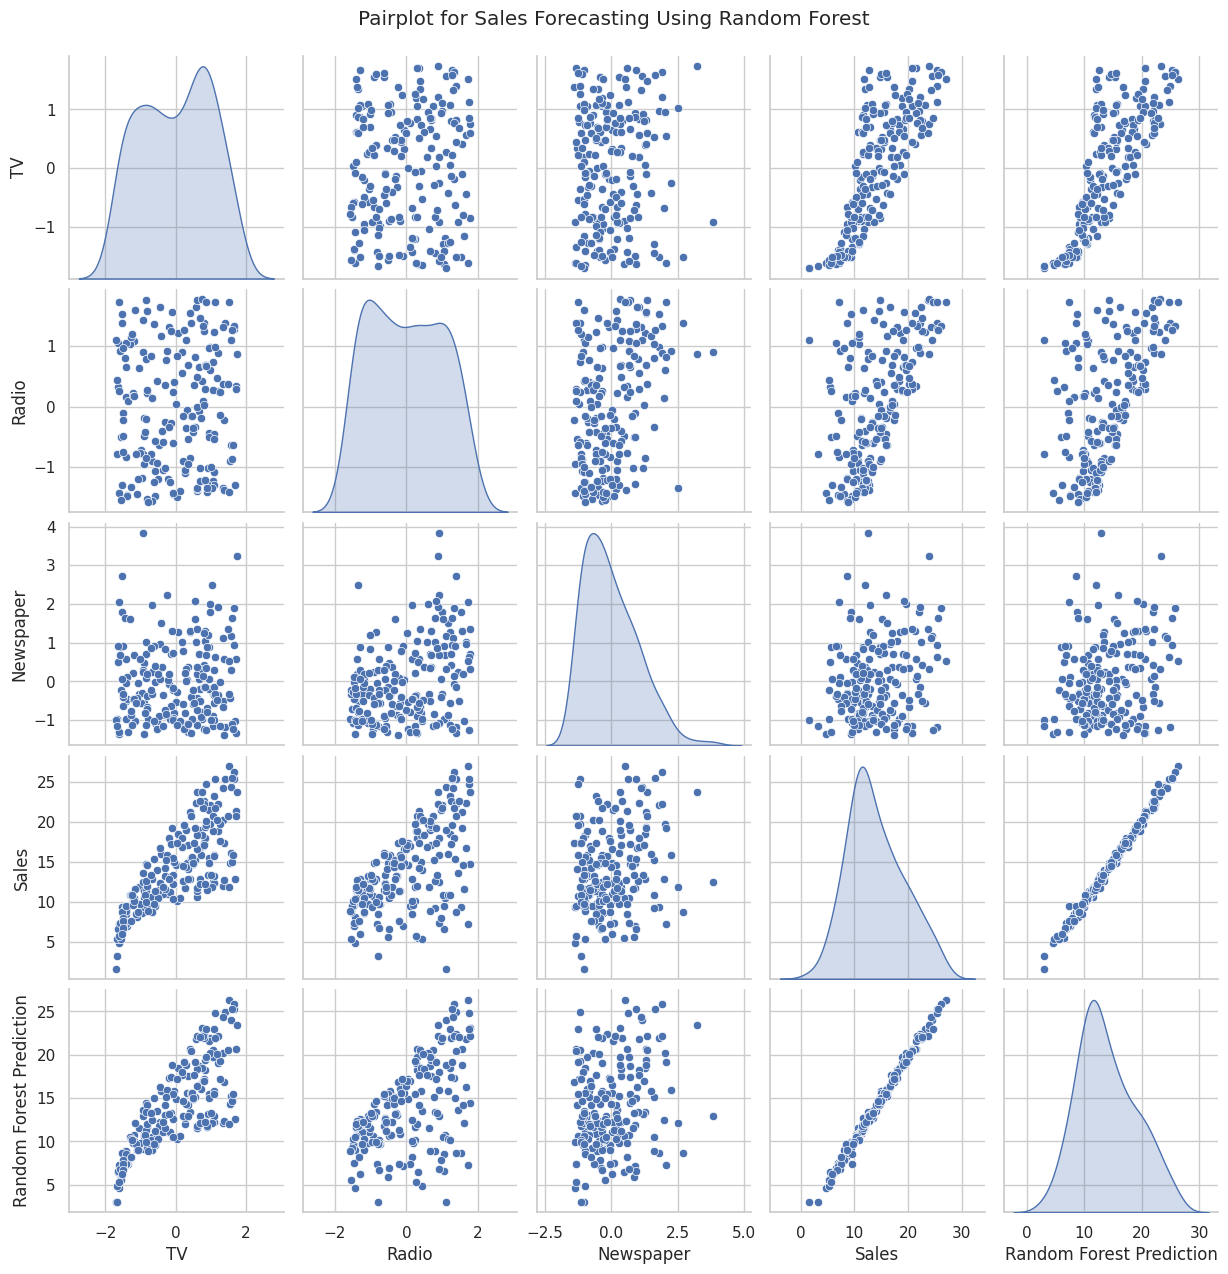

In [57]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
model_metrics = {}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    model_metrics[model_name] = {
        'model': model,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Print the comparison results
print("Model Performance Metrics:")
for model, metrics in model_metrics.items():
    print(f"\n{model}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  R²: {metrics['R2']:.2f}")

# Determine the best model based on R² (or change to another metric if desired)
best_model_name = max(model_metrics, key=lambda x: model_metrics[x]['R2'])
best_model = model_metrics[best_model_name]['model']  # Retrieve the model object

# Use the best model to predict on the full dataset for visualization
df[f'{best_model_name} Prediction'] = best_model.predict(X)

print(f"\nThe best model based on R² is: {best_model_name}")

# Plotting pairplot for the best model only
sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales', f'{best_model_name} Prediction']], diag_kind='kde')
plt.suptitle(f'Pairplot for Sales Forecasting Using {best_model_name}', y=1.02)
plt.show()


PREDICTION FROM THE USER INPUT

In [58]:
# predictions from input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_user_input():

    try:
        tv = float(input("Enter TV advertising budget: "))
        radio = float(input("Enter Radio advertising budget: "))
        newspaper = float(input("Enter Newspaper advertising budget: "))
        return [[tv, radio, newspaper]]
    except ValueError:
        print("Invalid input! Please enter numeric values.")
        return None

# new data for prediction
new_input = get_user_input()
if new_input is None:
    exit()

# Convert the new input into a DataFrame with appropriate feature names
feature_names = ['TV', 'Radio', 'Newspaper']
new_input_df = pd.DataFrame(new_input, columns=feature_names)

# Predict using the best model
best_model_name = max(model_metrics, key=lambda x: model_metrics[x]['R2'])
best_model = model_metrics[best_model_name]['model']  # Retrieve the model object

# Prediction with the best model on the new input
new_prediction = best_model.predict(new_input_df)

# Print the predicted sales
print(f"The predicted sales using {best_model_name} for the input {new_input} is: {new_prediction[0]:.2f}")

y_true = [30]
y_pred = new_prediction

# Calculate performance metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred) if len(y_true) > 1 else float('nan')

# Print metrics
print(f"R²: {r2:.2f}" if not np.isnan(r2) else "R²: Not Available for single prediction")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


Enter TV advertising budget: 150
Enter Radio advertising budget: 120
Enter Newspaper advertising budget: 80
The predicted sales using Random Forest for the input [[150.0, 120.0, 80.0]] is: 26.10
R²: Not Available for single prediction
MSE: 15.19
RMSE: 3.90
MAE: 3.90
